# Compressing Data via Dimensionality Reduction
This notebook will explore two fundamental techniques that help summarize the information content of a dataset by transforming it into a new feature subspace with lower dimensionality than the original. Specifically, we will focus on **Principal Component Analysis (PCA)** and **Linear Discriminant Analysis (LDA)** for linear dimensionality reduction, and **t-Distributed Stochastic Neighbor Embedding (t-SNE)** for nonlinear dimensionality reduction.

# Topics Covered
1. **Introduction to Dimensionality Reduction**

2. **Principal Component Analysis (PCA)**
   - Explanation of how PCA works.
   - Extracting the principal components step by step.
   - Principal component analysis in scikit-learn.
   - Assessing feature contributions.

3. **Linear Discriminant Analysis (LDA)**
   - Understanding LDA and its connection to classification tasks.
   - LDA via scikit-learn.
   - Visualization of LDA-transformed data.

4. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
   - Overview of t-SNE for nonlinear dimensionality reduction.
   - Application of t-SNE for visualizing high-dimensional data.
   - Discussion of t-SNE’s strengths and limitations.


### 1.Introduction to Dimensionality Reduction

Overview of the need for dimensionality reduction
In modern datasets, it is common to encounter high-dimensional data with numerous features or variables. While more features can provide richer information, high dimensionality often leads to several challenges, such as:

1.**Curse of Dimensionality**: As the number of dimensions increases, the volume of the feature space grows exponentially, making the data sparser. This sparsity can degrade the performance of machine learning models, as it becomes harder to find meaningful patterns and relationships between features.

<div style="text-align: center;">
    <img src="../images/Curse_of_Dimensionality_Chart.png" alt="Curse of Dimensionality" />
</div>


2.**Increased Computational Costs**: High-dimensional data requires more memory and computational power for processing, training, and evaluation of machine learning models. This can lead to slower runtimes and higher resource consumption.

3.**Overfitting**: When a model has too many features relative to the number of observations, it risks overfitting, capturing noise in the data rather than the underlying patterns. Dimensionality reduction helps mitigate overfitting by focusing on the most informative features.

4.**Visualization and Interpretation**: It is difficult to visualize and interpret data in high dimensions. Dimensionality reduction techniques enable the projection of data into 2D or 3D spaces, making it easier to understand and analyze the data visually.

By reducing the number of dimensions, we aim to maintain the most important information while simplifying the dataset, leading to faster computations, improved model performance, and more interpretable results.

### 2.Principal Component Analysis (PCA)
#### How PCA work?
**principal component analysis (PCA)**, an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. Other popular applications of PCA include exploratory data analysis and the denoising of signals in stock market trading, and the analysis of genome data and gene expression levels in the field of bioinformatics.

- **PCA** helps us to identify patterns in data based on the **correlation** between features.
- aims to find the directions of **maximum variance** in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one.

<div style="text-align: center;">
    <img src="../images/PCA_01.png" alt="Using PCA to find the directions of maximum variance in a dataset" height="500" />
</div>

In top figure **x1** and **x2** are the original feature axes, and **PC1** and **PC2** are the principal components.


If we use PCA for dimensionality reduction, we construct a d×k-dimensional transformation matrix, W, that allows us to map a vector of the features of the training example, x, onto a new k-dimensional feature subspace that has fewer dimensions than the original d-dimensional feature space. For instance, the process is as follows. Suppose we have a feature vector, x:
$$\mathbf{x = \left [ x_{1}, x_{2}, x_{3}, ..., x_{d}  \right ] x \epsilon \mathbb{R^{d}}}\boldsymbol{}$$

which is then transformed by a transformation matrix: $\mathbf{\boldsymbol{W\epsilon\mathbb{R^{d*k}}}}$
$$\mathbf{\boldsymbol{xW=z}}$$
resulting in the output vector:
$$\mathbf{z = \left [ z_{1}, z_{2}, z_{3}, ..., z_{k}  \right ] z \epsilon \mathbb{R^{k}}}\boldsymbol{}$$

As a result of transforming the original d-dimensional data onto this new k-dimensional subspace
(typically k << d), the first principal component will have the largest possible variance.


let's see PCA in simple steps:
1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvalues and eigenvectors.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimension ality of the new feature subspace.$$k \leq d$$
6. Construct a projection matrix, **W**, from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset, **X**, using the projection matrix, **W**, to obtain the new k-dimensional feature subspace

#### Extracting the principal components step by step

In [35]:
import pandas as pd
#df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
#                      header = None)
df_wine = pd.read_csv("../datasets/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

#Split data into train and test sets. 70% for train and 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=0)


**Standardize the data**

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

**Calculate Covariance matrix**:
the covariance between two features, $\mathbf{\boldsymbol{x_{j}}}$ and $\mathbf{\boldsymbol{x_{k}}}$, on the population level can be calculated via the following equation:

$$\mathbf{\boldsymbol{\sigma_{jk}=\frac{1}{n-1}\sum_{i=1}^{n}(x_{j}^{(i)}-\mu_{j})(x_{k}^{(i)}-\mu_{k})}}$$
Here, $\mathbf{\boldsymbol{\mu _{j}}}$ and $\mathbf{\boldsymbol{\mu _{k}}}$ are the samples means of features j and k.
For example, the covariance matrix of three features can then be written as follows:

$$\mathbf{\boldsymbol{\Sigma=\begin{bmatrix}\sigma _{1}^{2}&\sigma _{12}&\sigma _{13}\\\sigma _{21}&\sigma _{2}^{2}&\sigma _{23}\\\sigma _{31}&\sigma _{32}&\sigma _{3}^{2}\\\end{bmatrix}}}$$


We know that an eigenvector, $\mathbf{\boldsymbol{\vartheta}}$, satisfies the following condition.
$$\mathbf{\boldsymbol{\Sigma\vartheta=\lambda\vartheta}}$$
Here, $\mathbf{\boldsymbol{\lambda}}$ is scaler: the eigenvalue.

In [38]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

**Total and explained variance**

Since our goal is to reduce the dimensionality of the dataset by projecting it onto a new feature subspace, we will select only a subset of the eigenvectors **(principal components)** that capture most of the information (variance). Eigenvalues represent the magnitude of the eigenvectors, so we need to sort them in descending order based on their magnitude. We're interested in selecting the top $\mathbf{\boldsymbol{k}}$ eigenvectors according to their corresponding eigenvalues. Before we proceed to select those $\mathbf{\boldsymbol{k}}$ most informative eigenvectors, let’s first plot the explained variance ratios for the eigenvalues.

The explained variance ratio for an eigenvalue $\mathbf{\boldsymbol{\lambda _{j}}$ is simply the ratio of $\mathbf{\boldsymbol{\lambda _{j}}$ to the total sum of all eigenvalues.

 $$\mathbf{\boldsymbol{\texttt{Explained variance ratio}=\frac{\lambda _{j}}{\sum_{j=1}^{d}\lambda _{j}}}}$$


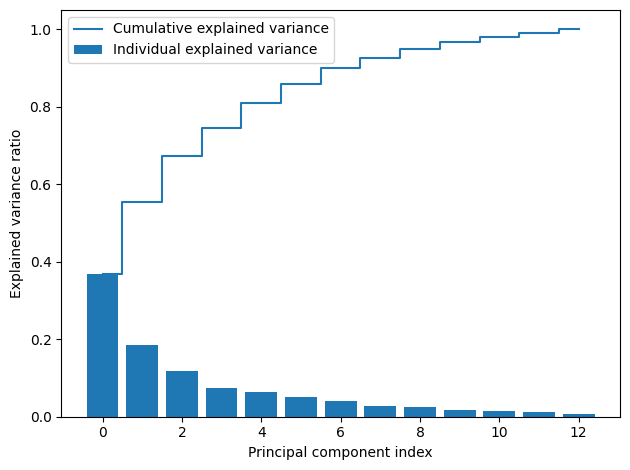

In [39]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(len(var_exp)), var_exp, align='center', label='Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The resulting plot indicates that the first principal component alone accounts for approximately 40
percent of the variance.
Also, we can see that the first two principal components combined explain almost 60 percent of the
variance in the dataset.
we should remind ourselves that PCA is an **unsupervised** method, which means that information about the class labels
is ignored

**Feature transformation**
Now that we have successfully decomposed the covariance matrix into eigenpairs, let’s proceed with the last three steps to transform the Wine dataset onto the new principal component axes.
1. Select k eigenvectors, which correspond to the $\mathbf{\boldsymbol{k}}$ largest eigenvalues, where $\mathbf{\boldsymbol{k}}$ is the dimensionality of the new features subspace($ k \leq d$).
2. Construct a projection matrix, **W**, from the top $\mathbf{\boldsymbol{k}}$ eigenvectors.
3. Transform the $\mathbf{\boldsymbol{d-dimensional}}$ input dataset, **X**, using the projection matrix, **W**, to obtain the new $\mathbf{\boldsymbol{k-dimensional}}$ features subspace.

In [40]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key = lambda k: k[0], reverse=True)
eigen_pairs

[(np.float64(4.8427453156558915),
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (np.float64(2.416024587035225),
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (np.float64(1.5484582488203522),
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (np.float64(0.9612043774977367),
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (np.float64(0.8416616104578417),
  array([-0.29062523,  0.08953787, 

In [41]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

Using the projection matrix, we can now transform an example, x (represented as a 13-dimensional
row vector), onto the PCA subspace (the principal components one and two) obtaining x′, now a
two-dimensional example vector consisting of two new features:
$$\mathbf{x` = xW}$$


In [42]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

Similarly, we can transform the entire 124×13-dimensional training dataset onto the two principal
components by calculating the matrix dot product:
$$\mathbf{X` = XW}$$

In [43]:
X_train_pca = X_train_std.dot(w)

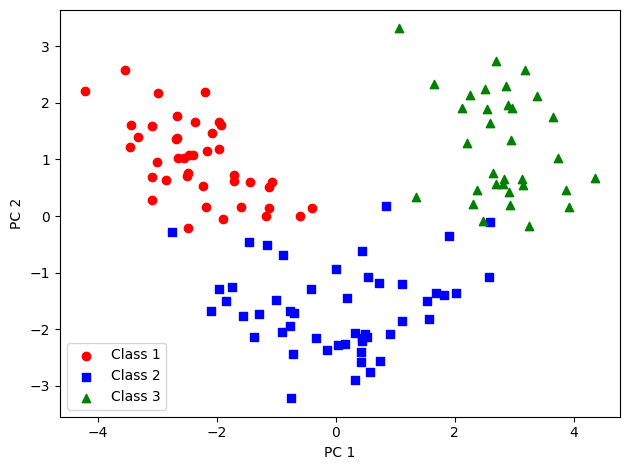

In [44]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### Principal component analysis in scikit-learn


In [45]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')


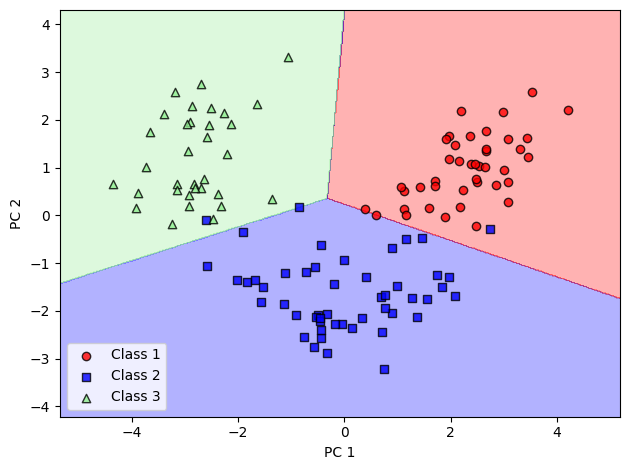

In [46]:
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(random_state=1,
                        solver='lbfgs')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#fitting model
ovr = OneVsRestClassifier(lr).fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=ovr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [47]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

#### Assessing feature contributions
In this section, we will take a brief look at how we can assess the contributions of the original features
to the principal components.
These contributions are often called loadings.



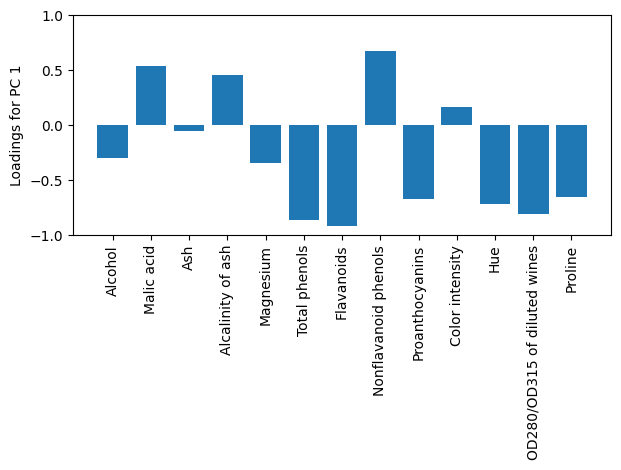

In [48]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In Figure, we can see that, for example, Alcohol has a negative correlation with the first principal
component (approximately –0.3), whereas Malic acid has a positive correlation (approximately 0.54).

### Linear Discriminant Analysis
#### Understanding LDA and its connection to classification tasks

**LDA** can be used as a technique for feature extraction to increase computational efficiency and reduce
the degree of overfitting due to the curse of dimensionality in non-regularized models. The general
concept behind LDA is very similar to PCA, but whereas PCA attempts to find the orthogonal component
axes of maximum variance in a dataset, the goal in LDA is to find the feature subspace that optimizes
class separability. In the following sections, we will discuss the similarities between LDA and PCA in
more detail and walk through the LDA approach step by step.

<div style="text-align: center;">
    <img src="../images/Concept of LDA.png" alt="Curse of Dimensionality" height="500"/>
</div>


The concept of LDA for a two-class problem

A linear discriminant, as shown on the x axis (LD 1), would separate the two normal distributed classes well. Although the exemplary linear discriminant shown on the y axis (LD 2) captures a lot of the variance in the dataset, it would fail as a good linear discriminant since it does not capture any of the class-discriminatory information.
One assumption in LDA is that the data is normally distributed. Also, we assume that the classes have identical covariance matrices and that the training examples are statistically independent of each other. However, even if one, or more, of those assumptions is (slightly) violated, LDA for dimensionality reduction can still work reasonably well (Pattern Classification 2nd Edition by R. O. Duda, P. E. Hart, and D. G. Stork, New York, 2001).


**The inner workings of linear discriminant analysis**
1. Standardize the d-dimensional dataset (d is the number of features).
2. For each class, compute the d-dimensional mean vector.
3. Construct the between-class scatter matrix, $\textbf{\boldsymbol{S_{B}}}$, and the within-class scatter matrix,$\textbf{\boldsymbol{S_{W}}}$.
4. Compute the eigenvectors and corresponding eigenvalues of the matrix, $\textbf{\boldsymbol{S_{W}^{-1}S_{B}}}$.
5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
6. Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d×k-dimensional transformation matrix, $\textbf{\boldsymbol{W}}$; the eigenvectors are the columns of this matrix.
7. Project the examples onto the new feature subspace using the transformation matrix, $\textbf{\boldsymbol{W}}$.

#### LDA via scikit-learn

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

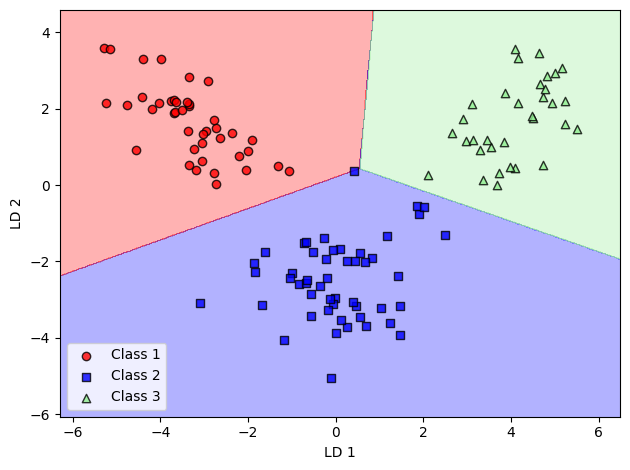

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(random_state=1, solver='lbfgs')

ovr = OneVsRestClassifier(lr).fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=ovr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()


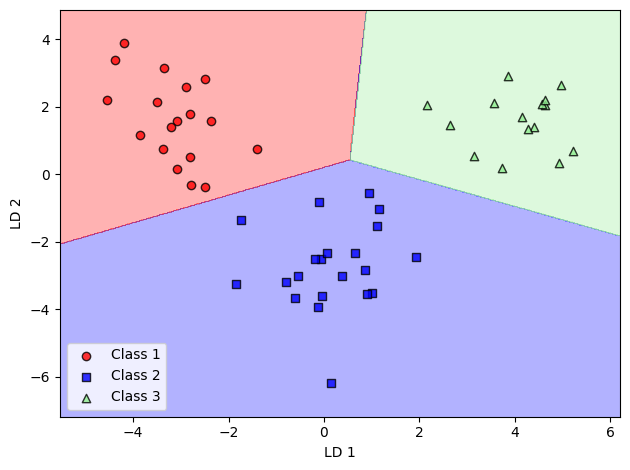

In [51]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=ovr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()